# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST

### MNIST란?
* 프로그램 언어를 처음 배울 때 Hello World!라는 문구를 출력하듯이 딥러닝을 시작하면 사용하는 데이터셋이 MNIST입니다. 
* 이 데이터는 손으로 쓴 0 ~ 9 까지의 숫자로 이루어져 있습니다. 
* MNIST와 크기, 개수가 동일하지만 숫자 대신 패션 아이템으로 이루어진 데이터가 바로 패션 MNIST임 

## 딥러닝 프레임윅

### Tensorflow
* 구글이 2011년 개발을 시작하여 2015년에 오픈 소스로 공개한 기계학습 라이브러리. 
* 일반인들도 사용하기 쉽도록 다양한 기능들을 제공한다. 
* 다수의 언어를 지원하지만 파이썬 관련 자료가 가장 많다.
* 1.x 버전의 복잡한 코드때문에 Keras를 사용하여 사용하는 경우가 많음. 
* 2.x 버전에서는 Keras를 흡수하여 통합함

### Pytorch

* Python 머신러닝 라이브러리 
* torch를 기반으로 하며, 자연어 처리와 같은 애플리케이션에서 많이 활용되고 있음 
* 페이스북 AI 리서치 랩에서 개발함

### Tensorflow VS Pytorch

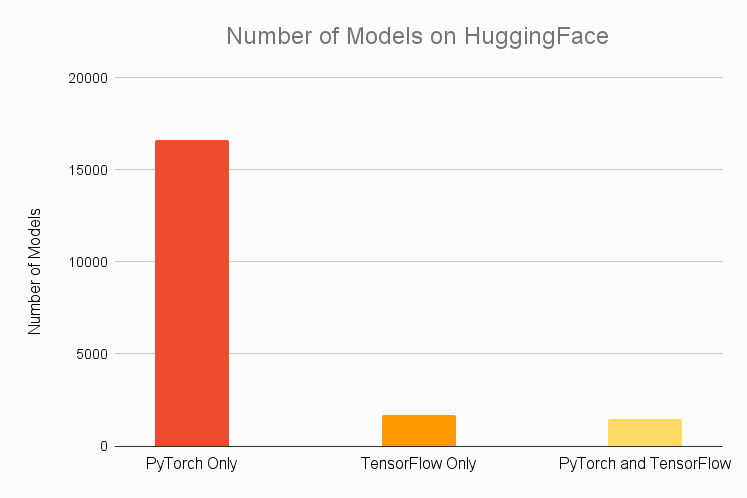

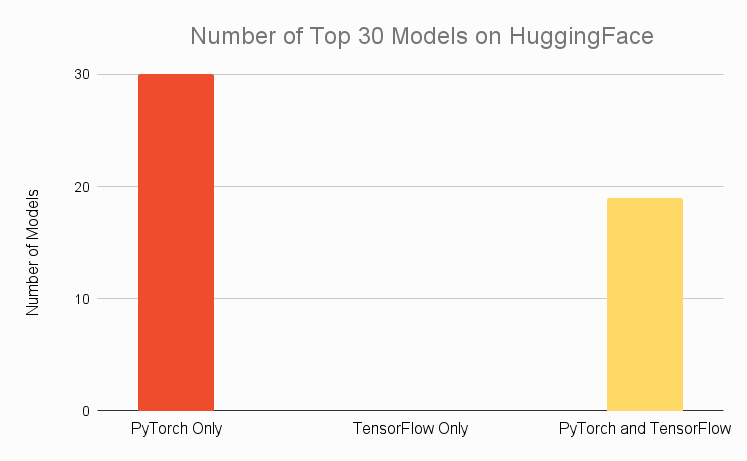

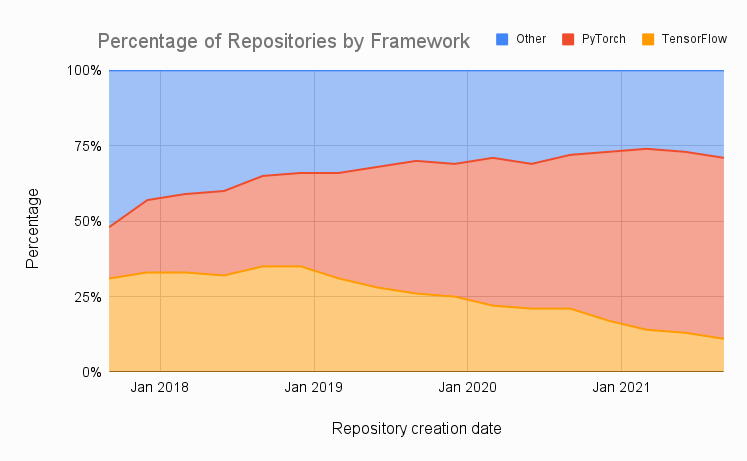

In [ ]:
# pip install tensorflow - cpu version 
# pip install tensorflow-gpu

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


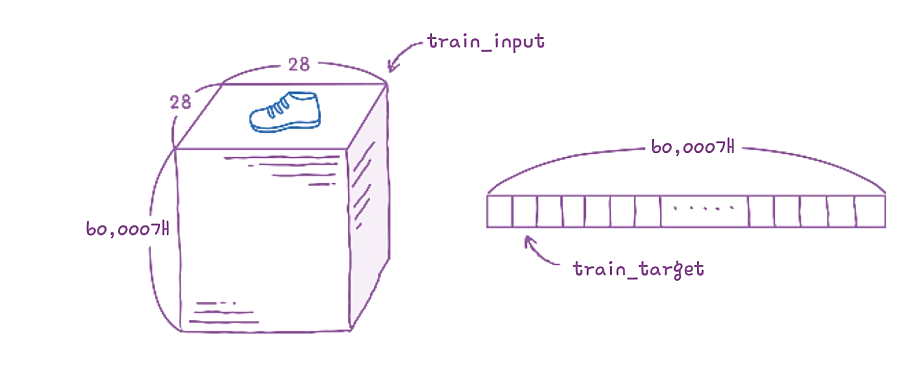

* 훈련 데이터는 60,000개의 이미지로 이루어짐. 
* 각 이미지의 크기는 28 x 28
* 타킷도 60,000개의 원소가 있는 1차원 배열

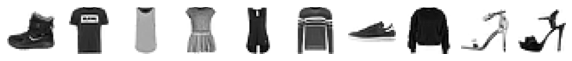

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [9]:
train_target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

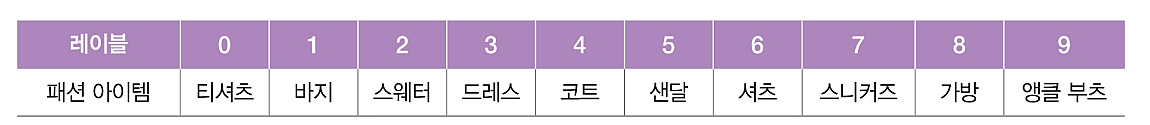

In [10]:
import numpy as np

In [11]:
np.unique(train_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


* 각각의 레이블 값마다 6,000개의 샘플이 들어 있음

## 로지스틱 회귀로 패션 아이템 분류하기

In [26]:
train_input[0,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [31]:
train_input.shape

(60000, 28, 28)

* rgb 색상은 0 ~ 255

In [27]:
28*28

784

In [28]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [29]:
train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
train_scaled.shape

(60000, 784)

### 정규화
* 이미지의 경우 픽셀 값이 0 ~ 255 사이의 정수값을 가짐 
* 255로 나누어 0 ~ 1 사이의 값으로 정규화함 
### 딥러닝에서 정규화해야 하는 이유 
* 확률적 경사 하강법은 기울기가 가장 가파른 방향으로 따라 이동하는데 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실 함수의 경사를 내려올 수 없고, 또한 시간이 많이 걸림

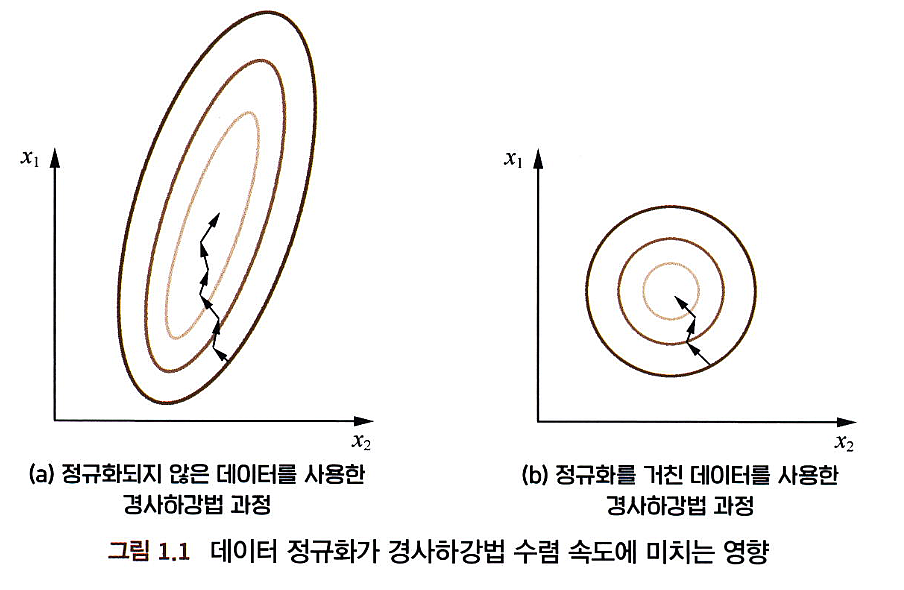

* SGDClassifier 클래스의 loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화하는 확률적 경사 하강법을 사용 
* SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정
* loss는 손실 함수의 종류
    * log로 지정하여 로지스틱 손실 함수를 지정 
* max_iter는 수행할 에폭(epoch) 횟수를 지정 
    * 너무 많이 epoch 숫자를 넣으면 과적합이 일어남

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


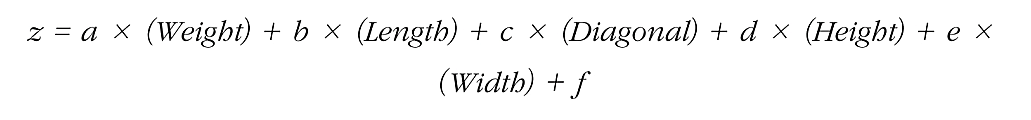

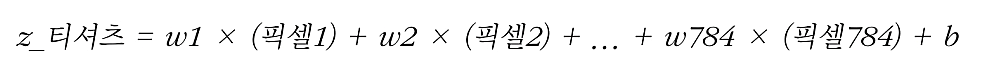

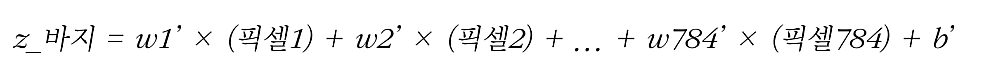

* 각각의 레이블 값을 예측하기 위해서는 다른 가중치와 절편을 사용해야 함

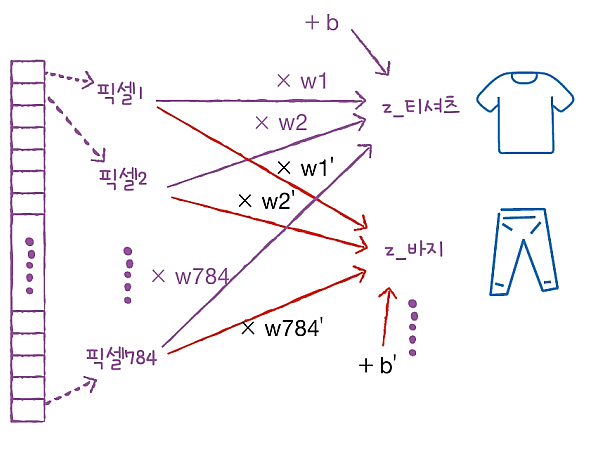

* 10개의 클래스에 대한 선형 방정식을 모두 계산한 다음에는 소프트맥스 함수를 사용하여 각 클래스에 대한 확률을 얻음 

## 인공신경망

* 가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같습니다. 

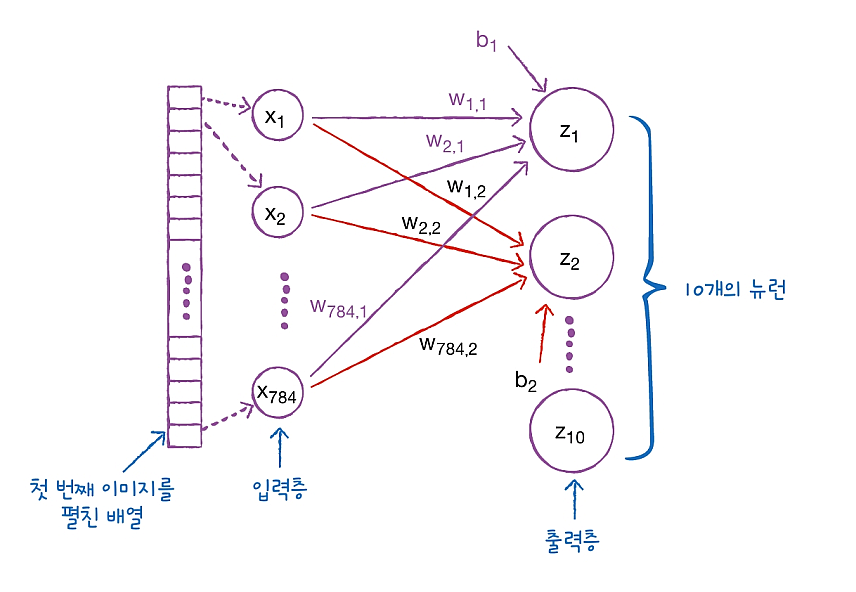

* $ z_1 $ ~ $ z_{10} $을 계산하고 이를 바탕으로 클래스를 예측하기 때문에 신경망의 최종 값을 만든다는 의미에서 출력층(output layer)라고 부릅니다. 
* z를 값을 계산하는 단위를 뉴런이라고 부릅니다. 
* 뉴런에서 일어나는 일은 선형 계산이 전부!! 뉴런이라는 표현 대신에 unit 혹은 node라고도 표현합니다. 
* $ x_1 $  ~ $ x_{784} $  까지를 입력층(input layer)이라고 부릅니다. 

### 텐서플로와 케라스

* 텐서플로에는 저수준 API와 고수준 API가 있습니다. 
* 케라스는 고수준 API입니다. 
* 2015년 3월 프랑소와 숄레가 만든 딥러닝 라이브러리입니다. 
* 케라스는 직접 GPU 연산을 사용하지 않고 대신 GPU연산을 수행하는 다른 라이브러리를 백엔드로 사용합니다. 
    * Theano, CNTK와 같은 여러 딥러닝 라이브러리를 백엔드로 사용할 수 있음

## 인공신경망으로 모델 만들기

* 인공신경망에서는 교차 검증을 잘 사용하지 않고 검증 셋을 별도로 덜어내어 사용 

1. 딥러닝 분야의 데이터셋은 충분한 크기 때문에 검증 점수가 안정적이고

2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문


In [33]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [34]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [35]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [36]:
model = keras.Sequential(dense)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


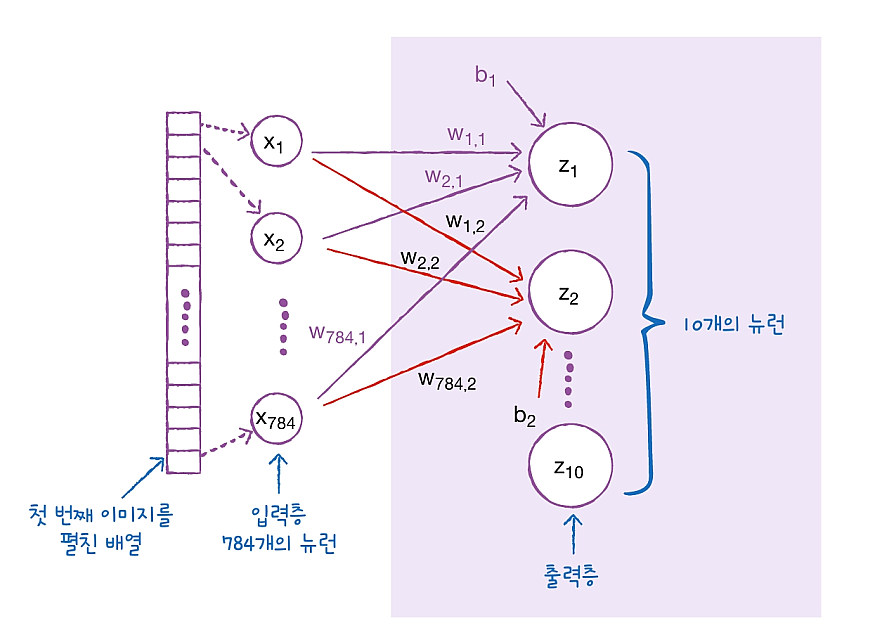

* 가장 기본이 되는 층은 밀집층(dense layer)입니다. 
* 아래 그림처럼 왼쪽의 노드와 오른쪽의 노드가 모두 연결되어 있습니다. 

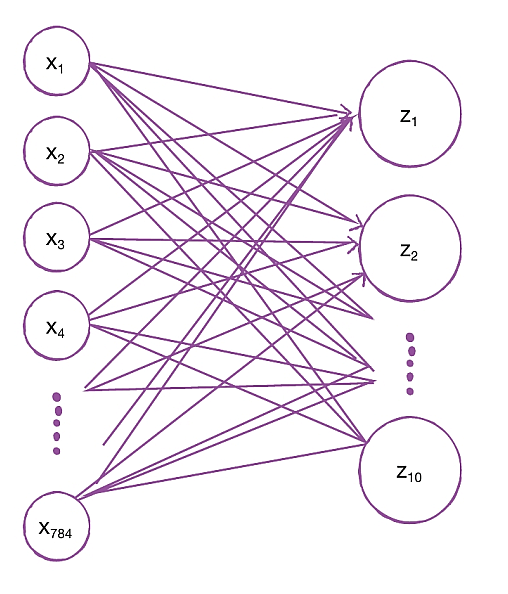

* 이런 층을 양쪽의 뉴런이 모두 연결하고 있기 때문에 완전 연결층(fully connected layer)라고 부릅니다. 

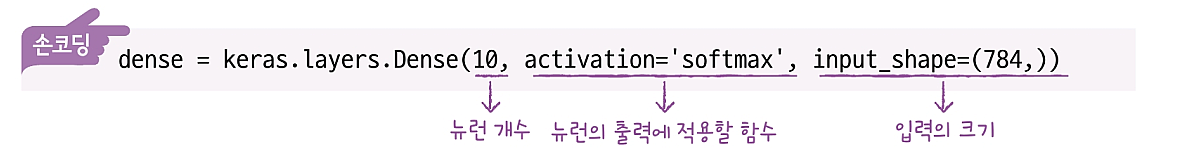

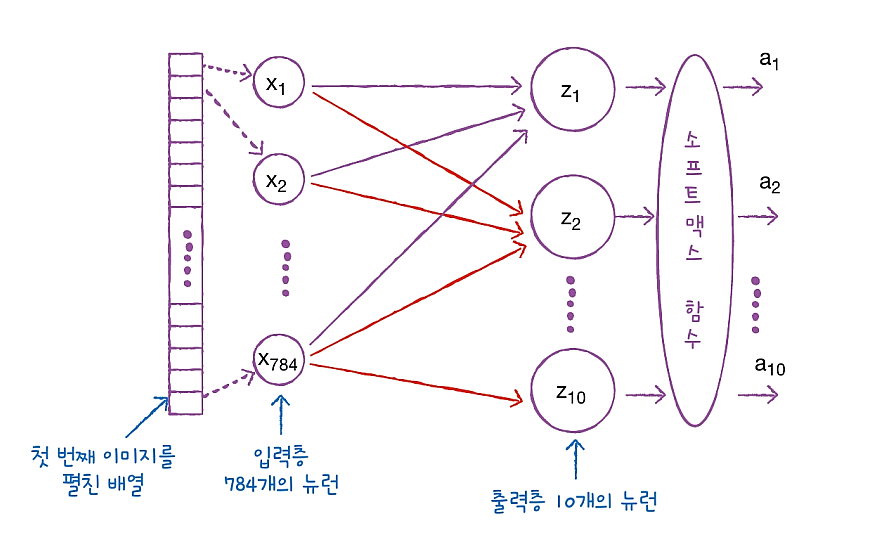

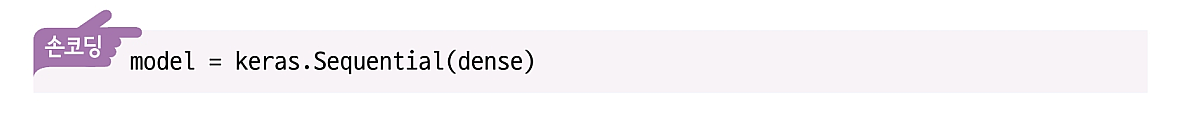

* sequential 클래스의 객체를 만들 때 앞에서 만든 밀집층의 객체 dense를 전달
* 여기서 만든 model 객체가 바로 신경망 모델
* 절편(bias)가 뉴런마다 더해진다는 것을 꼭 명심 
* 소프트맥스와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수(activation function)이라고 함

## 인공신경망으로 패션 아이템 분류하기

* 케라스 모델은 훈련하기 전에 설정해야 하는 단계가 존재 
* 이런 설정을 model 객체의 compile() 메서드에서 수행 
* 손실 함수의 종류도 여기서 지정 
#### 손실함수
* 이진 분류 : 'binary_crossentropy'
* 다중 분류 : 'categorical_crossentropy'

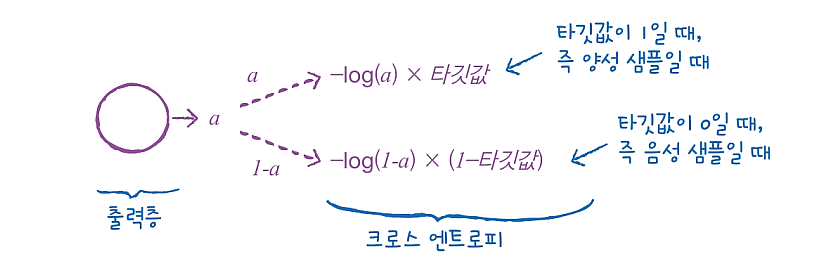

#### sparse의 의미

* 다중 분류 문제에서 크로스 엔트로피  손실 계산

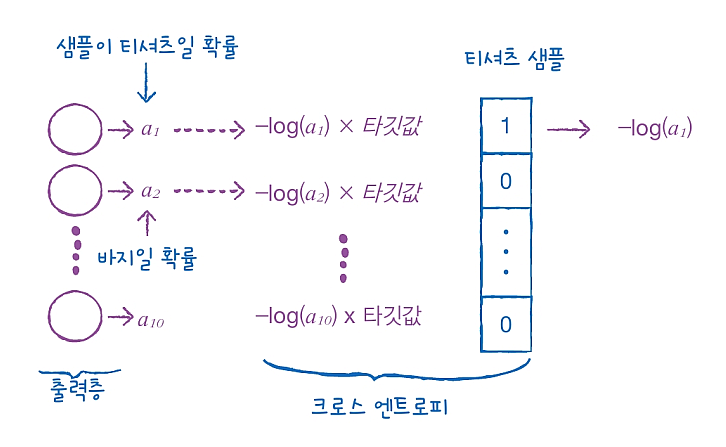

* 출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력
* 첫 번째 뉴런은 티셔츠일 확률이고 두 번째 뉴런은 바지일 확률을 출력 
* 이진 분류와 달리 각 클래스에 대한 확률이 모두 출력되지 때문에 타깃에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱함

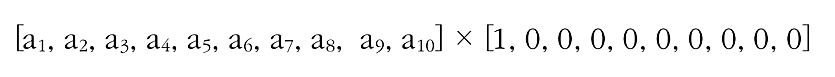

* 해당 레이블의 샘플을 정확하게 분류하려면 신경망이 해당 출력을 가능한 한 높여야 한다. 
* 이때 타깃값에 해당하는 클래스만 1로 설정하고 나머지는 모두 0인 one-hot encoding을 사용

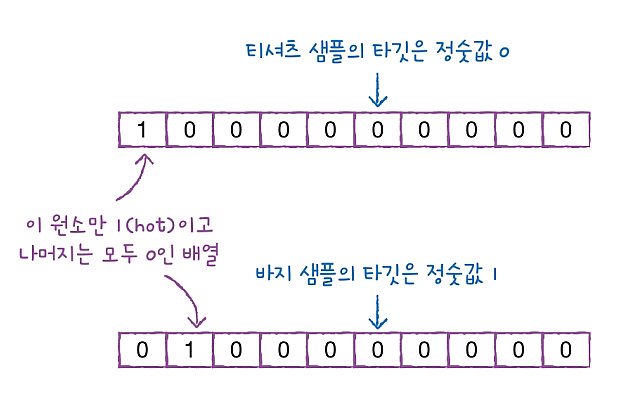

* 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산한다는 것이 바로 sparse_categorical_crossentropy
* 타깃값을 one-hot encoding으로 준비했다면 compile() 메서드에 손실 함수를 categorical_crossentropy로 지정 
* 평가 지표로는 정확도로 설정

In [40]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [41]:
train_scaled.shape

(48000, 784)

In [42]:
train_target

array([7, 3, 5, ..., 6, 6, 1], dtype=uint8)

In [39]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inp

In [43]:
model.fit(train_scaled, train_target, validation_data = (val_scaled, val_target), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6087 - accuracy: 0.7952 - val_loss: 0.5125 - val_accuracy: 0.8204
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4784 - accuracy: 0.8387 - val_loss: 0.4721 - val_accuracy: 0.8402
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4557 - accuracy: 0.8476 - val_loss: 0.4709 - val_accuracy: 0.8392
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.8524 - val_loss: 0.4606 - val_accuracy: 0.8443
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8551 - val_loss: 0.4525 - val_accuracy: 0.8495


In [45]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.8558


[0.4432859718799591, 0.8557500243186951]

## 참고

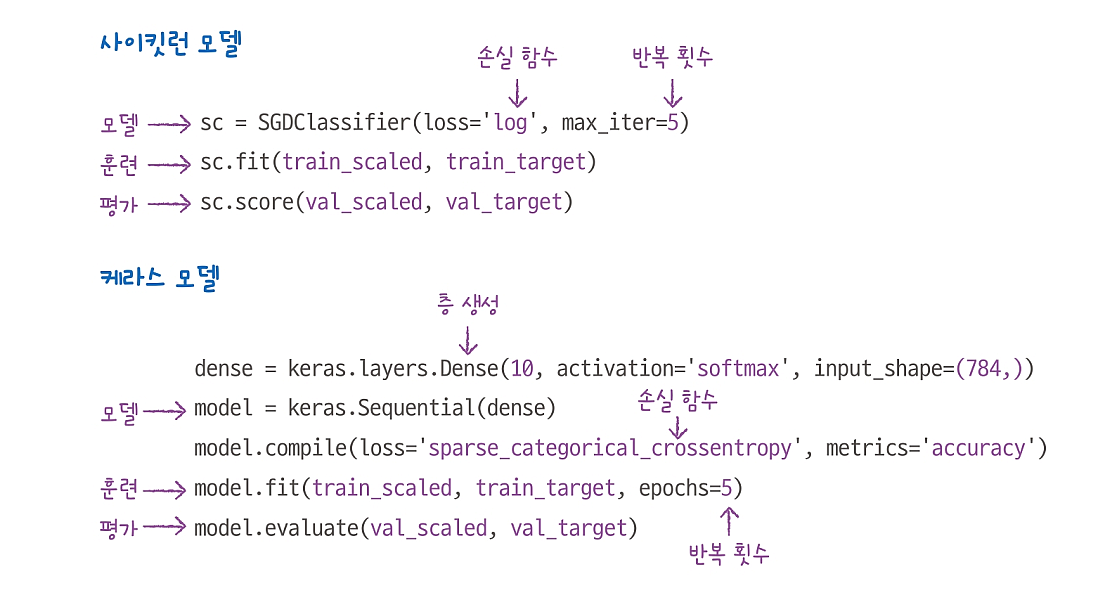

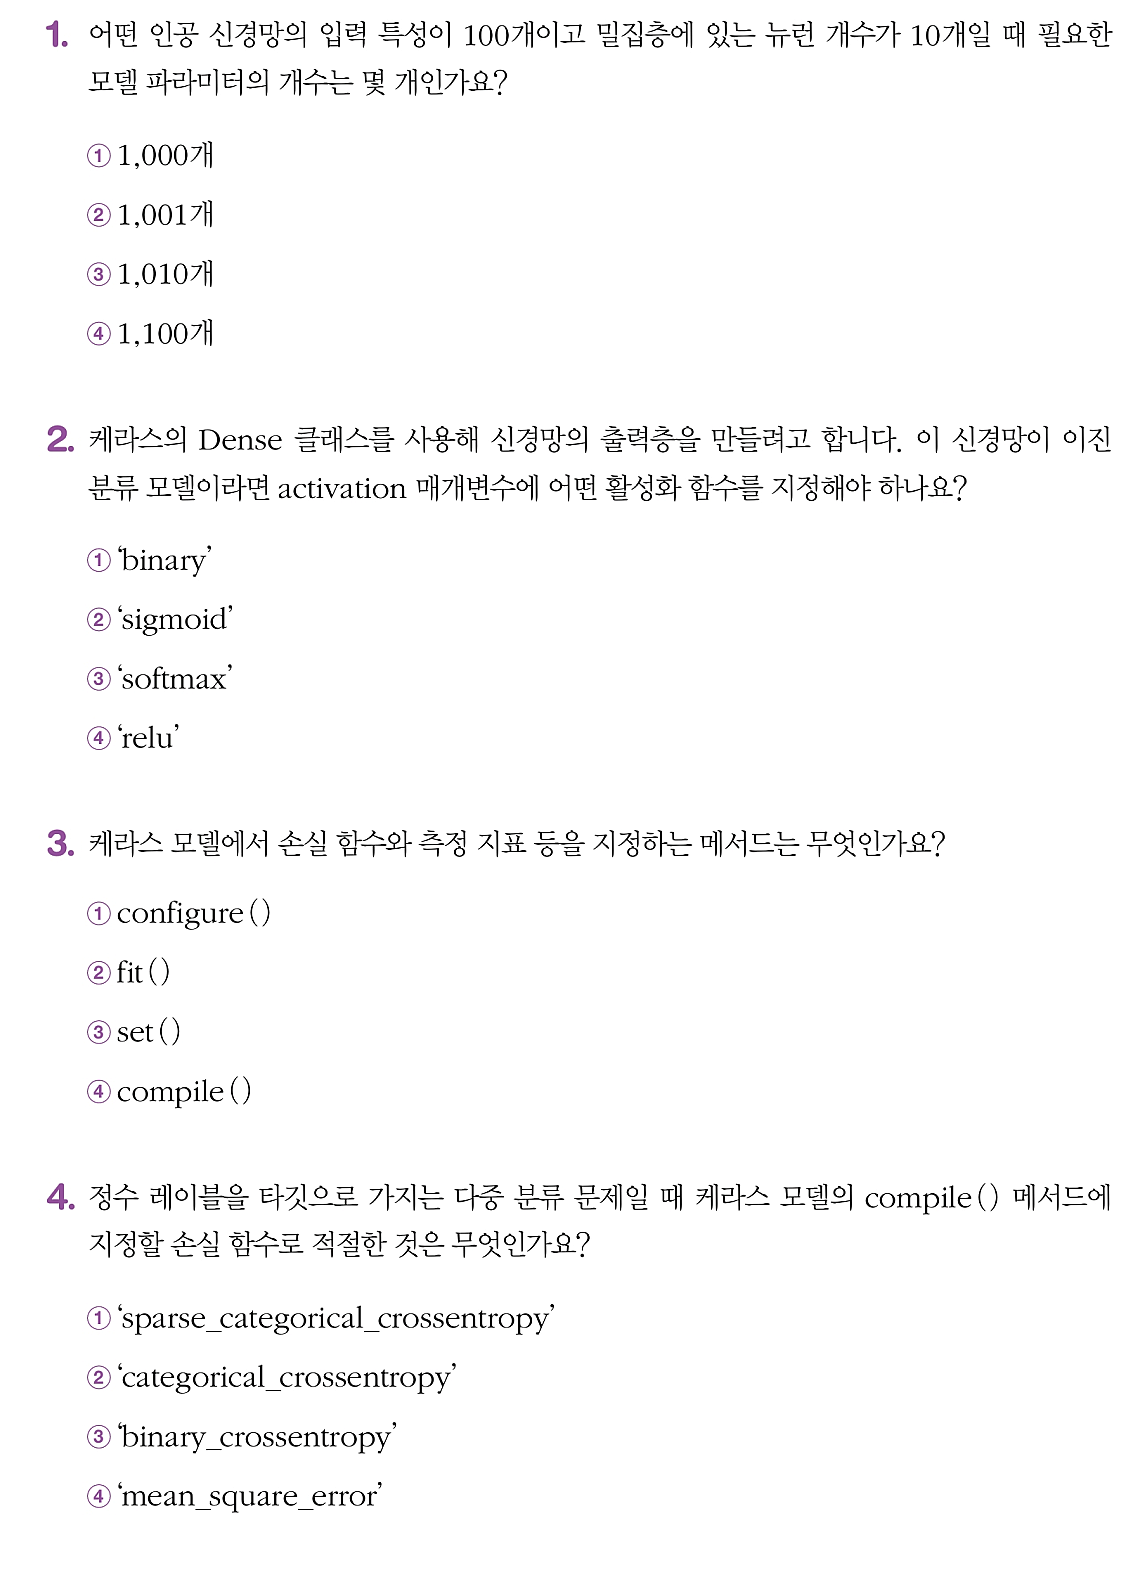